<a href="https://colab.research.google.com/github/pradiptars/Ml_kaggel_diabetes/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
df = pd.concat([train, test], axis=0)

In [6]:
df.head(5)

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [7]:
pd.set_option('display.max_columns', None)


In [8]:
df.head(2)

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,62,199,58,114,102,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,71,199,50,121,124,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0


In [9]:
df.select_dtypes(include='object').columns

Index(['gender', 'ethnicity', 'education_level', 'income_level',
       'smoking_status', 'employment_status'],
      dtype='object')

In [10]:
df = pd.get_dummies(df, columns=['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status'], drop_first=True, dtype='int64')

In [11]:
df.head(2)

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes,gender_Male,gender_Other,ethnicity_Black,ethnicity_Hispanic,ethnicity_Other,ethnicity_White,education_level_Highschool,education_level_No formal,education_level_Postgraduate,income_level_Low,income_level_Lower-Middle,income_level_Middle,income_level_Upper-Middle,smoking_status_Former,smoking_status_Never,employment_status_Retired,employment_status_Student,employment_status_Unemployed
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,62,199,58,114,102,0,0,0,1.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,71,199,50,121,124,0,0,0,1.0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0


<Axes: >

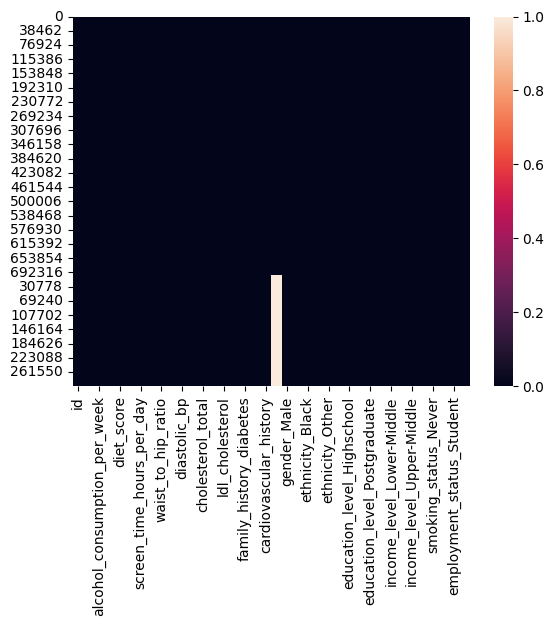

In [12]:
sns.heatmap(df.isnull())

In [13]:
for column in df.columns:
    if df[column].isnull().any() and column != 'diagnosed_diabetes':
        if df[column].dtype in ['int64', 'float64']:
            df[column] = df[column].fillna(df[column].mean())

# Display the sum of null values per column to verify the imputation
print("Null values after imputation:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Null values after imputation:
diagnosed_diabetes    300000
dtype: int64


<Axes: >

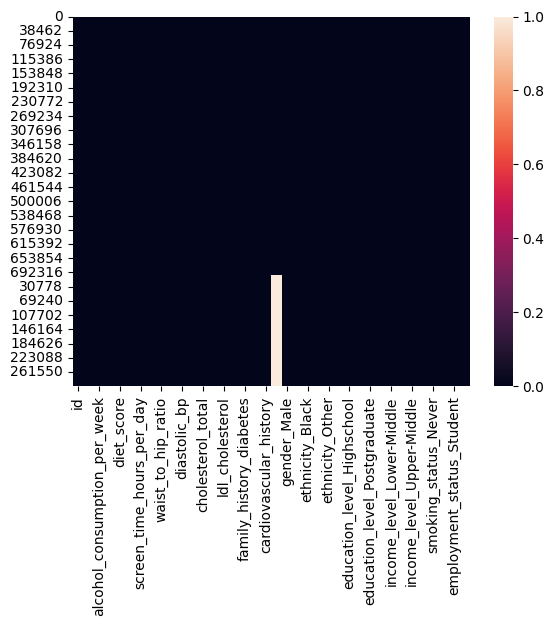

In [14]:
sns.heatmap(df.isnull())

In [15]:
df.keys()

Index(['id', 'age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'diagnosed_diabetes', 'gender_Male',
       'gender_Other', 'ethnicity_Black', 'ethnicity_Hispanic',
       'ethnicity_Other', 'ethnicity_White', 'education_level_Highschool',
       'education_level_No formal', 'education_level_Postgraduate',
       'income_level_Low', 'income_level_Lower-Middle', 'income_level_Middle',
       'income_level_Upper-Middle', 'smoking_status_Former',
       'smoking_status_Never', 'employment_status_Retired',
       'employment_status_Student', 'employment_status_Unemployed'],
      dtype='object')

In [16]:
df['diagnosed_diabetes'].fillna(df['diagnosed_diabetes'].mean(), inplace=True)

/tmp/ipython-input-1285229280.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diagnosed_diabetes'].fillna(df['diagnosed_diabetes'].mean(), inplace=True)


<Axes: >

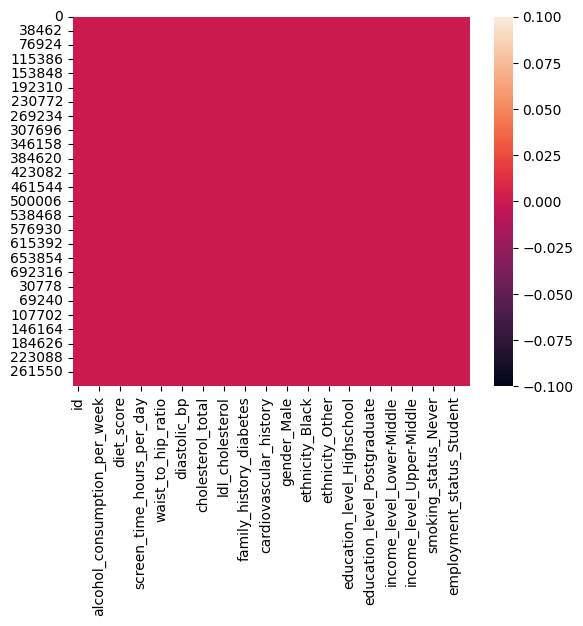

In [17]:
sns.heatmap(df.isnull())

In [18]:
df.isnull().sum()

,0
id,0
age,0
alcohol_consumption_per_week,0
physical_activity_minutes_per_week,0
diet_score,0
sleep_hours_per_day,0
screen_time_hours_per_day,0
bmi,0
waist_to_hip_ratio,0
systolic_bp,0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import KFold, cross_val_score

In [20]:
X = df.drop('diagnosed_diabetes', axis=1)
y = df['diagnosed_diabetes']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
lr.score(X_test, y_test)

0.07032707017080764

In [25]:
import xgboost as xgb
xgb= xgb.XGBRegressor(random_state=42, bbooster='gbtree')
xgb.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:02:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "bbooster" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(base_score=None, bbooster='gbtree', booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, ...)

In [27]:
xgb.score(X_test, y_test)

0.13841812065949888

In [28]:
def test_model(model, X_train, y_train):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=r2)
    score = [r2_val_score.mean()]
    return score

In [29]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
test_model(dt, X_train, y_train)

[np.float64(-0.773537964374791)]

In [30]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [31]:
y_pred = np.exp(dt.predict(X_test))

In [32]:
y_pred

array([1.86506464, 1.        , 1.        , ..., 1.        , 2.71828183,
       2.71828183])

In [33]:
submit_test = pd.concat([test['id'], pd.DataFrame(y_pred, columns=['diagnosed_diabetes'])], axis=1)
submit_test.head()

,id,diagnosed_diabetes
0,700000,1.865065
1,700001,1.000000
2,700002,1.000000
3,700003,2.718282
4,700004,2.718282


In [34]:
submit_test.to_csv('diabetes_submission.csv', index=False)